In [1]:
# Importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import folium
import os
from matplotlib import rcParams

## Problem 1
Take the Gapminder Test: http://forms.gapminder.org/s3/test-2018.
What score did you receive? Did any of the answers surprise you?
Choose a question from the test, re-state it, and answer it using visualization and summarization. Provide a
figure and any relevant output with your answer.

I scored 8/13 (61%) in the test. I think it is because I had a lot of preconceived ideas about the world and underestimated the improvement in the world. Also, the media around showcases more about what is wrong with the world as compared to what good is happening in the world. The answers that surprised me was that 60% of the girls in low-income countries have completed the fifth grade. Also, the fact that 80% of the world’s 1-year-old children today have been vaccinated against some disease. Both of these are great news.

#### How many of the world’s 1-year-old children today have been vaccinated against some disease?

In [44]:
# Loading the dataset
folder_path = "ddf--gapminder--systema_globalis//"
immunized = pd.read_csv(folder_path + 
                         "ddf--datapoints--pab_immunized_percent_of_newborns--by--geo--time.csv")

# Renaming the columns
immunized = immunized.rename(columns={"pab_immunized_percent_of_newborns": "percent_immunized", "time": "year"})
    

In [45]:
immunized.head()

,geo,year,percent_immunized
0,afg,1981,3
1,afg,1982,2
2,afg,1983,4
3,afg,1984,5
4,afg,1985,13


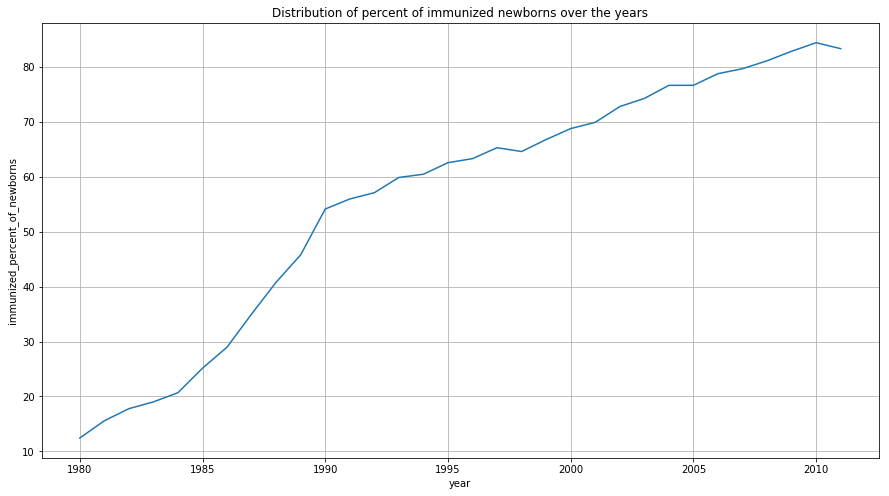

In [46]:
df = immunized.groupby('year')['percent_immunized'].mean().reset_index()
# Visualizing the distribution of percent of immunized newborns over the years
ax = sns.lineplot(x="year", y="percent_immunized", data=df)
ax.set_title('Distribution of percent of immunized newborns over the years')
ax.set_ylabel('immunized_percent_of_newborns')
ax.grid(True)

From the plot above, it can be observed that the percent of one-year-olds that are vaccinated has increased over the years. It can be observed from the plot that today more than 80% of the one-year-olds are vaccinated just as mentioned in the answer.

### Problem 2
Visualize the distribution of income (GDP / capita) across countries and continents, and how the distribution
of income changes over time.
Interpret the visualization and what you notice. Are they any notable trends and/or deviations from that
trend?
What caveats apply to your conclusions?


In [47]:
# Loading the dataset
folder_path = "ddf--gapminder--systema_globalis//"
gdp_capita = pd.read_csv(folder_path + 
                         "ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv")
# Renaming the columns
gdp_capita = gdp_capita.rename(columns={"income_per_person_gdppercapita_ppp_inflation_adjusted": "income", "time": "year"})

# Adding country an continent columns to the dataframe
gdp_capita["country"] = gdp_capita["geo"]
gdp_capita["continent"] = gdp_capita["geo"]
geo_country_map = pd.read_csv(folder_path + 'ddf--entities--geo--country.csv')
for i, row in gdp_capita.iterrows():
    gdp_capita.at[i,"country"] = geo_country_map[geo_country_map["country"] == row["geo"]].name.values[0]
    gdp_capita.at[i,"continent"] = geo_country_map[geo_country_map["country"] == row["geo"]].world_4region.values[0]

In [48]:
gdp_capita.head()

,geo,year,income,country,continent
0,afg,1800,603,Afghanistan,asia
1,afg,1801,603,Afghanistan,asia
2,afg,1802,603,Afghanistan,asia
3,afg,1803,603,Afghanistan,asia
4,afg,1804,603,Afghanistan,asia


In [6]:
# Visualizing the distribution of income (GDP / capita) across continents and how it changes over time.
# Getting the mean income
df = gdp_capita.groupby(['continent', 'year'])['income'].mean().reset_index(name = 'mean_income')

df.head()

,continent,year,mean_income
0,africa,1800,626.740741
1,africa,1801,627.296296
2,africa,1802,627.907407
3,africa,1803,628.444444
4,africa,1804,629.037037


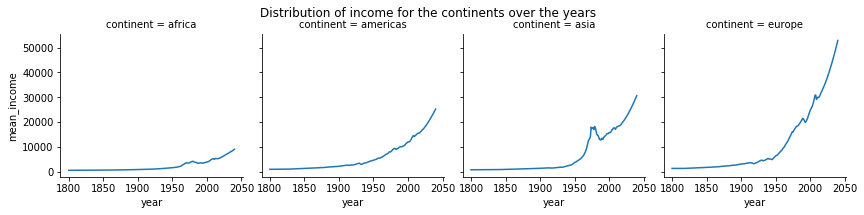

In [7]:
# Creating a facet grid of continents
g = sns.FacetGrid(df, col='continent', col_wrap=4, sharex=True, sharey=True)
 
# adding a line plot of mean income verses years
g = g.map(plt.plot, 'year', 'mean_income')

plt.subplots_adjust(top=0.855)
g = g.fig.suptitle('Distribution of income for the continents over the years')
 

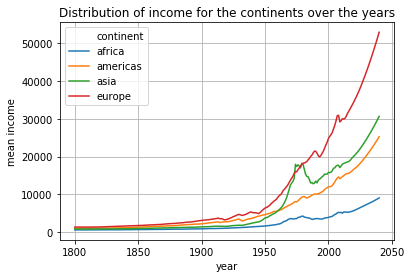

In [8]:
# Visualizing the distribution of income (GDP / capita) across continents and how it changes over time.
ax = sns.lineplot(x="year", y="mean_income", hue="continent", data=df)
ax.set_title('Distribution of income for the continents over the years')
ax.set_ylabel('mean income')
ax.grid(True)

##### From the plot above it can be observed that the income of all the continents has increased over the years.
##### The continent with the highest income is Europe and the one with the lowest is Africa. Asia had income higher than Europe for a short period around the 1970s and then the income of Europe was the highest again.
##### The income has increased slowly until 1950 and rapidly after.

In [9]:
# Dataframe used to visualize
df = gdp_capita[['year', 'country', 'income', 'continent']]

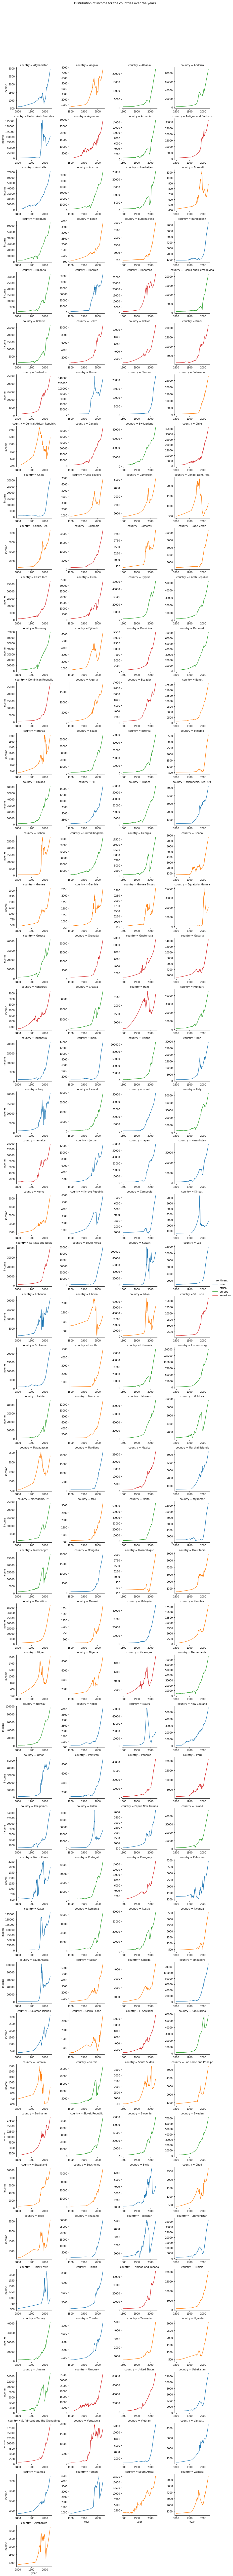

In [10]:
# Visualizing the distribution of income (GDP / capita) across each countries and how it changes over time.
# Create a Grid of countries
g = sns.FacetGrid(df, col='country',hue='continent', col_wrap=4, sharex=False, sharey=False)
 
# Add the line over the area with the plot function
g = g.map(plt.plot, 'year', 'income')

g.add_legend()

plt.subplots_adjust(top=0.975)
g = g.fig.suptitle('Distribution of income for the countries over the years')

##### In the plot above the income of every country over time is displayed and the color of the plot is the continent to which the country belongs. On observing the plot for the United  Arab Emirates, we can see that the income increased and reached its highest around the 1950s and then started decreasing till 2000s and then increased again. This may be due to oil prices. This similar trend can be seen in all the oil-producing countries. China, South Korea, and India had low income but near 2000 the income increased rapidly. The income of most of the African countries increased near the 2000s.

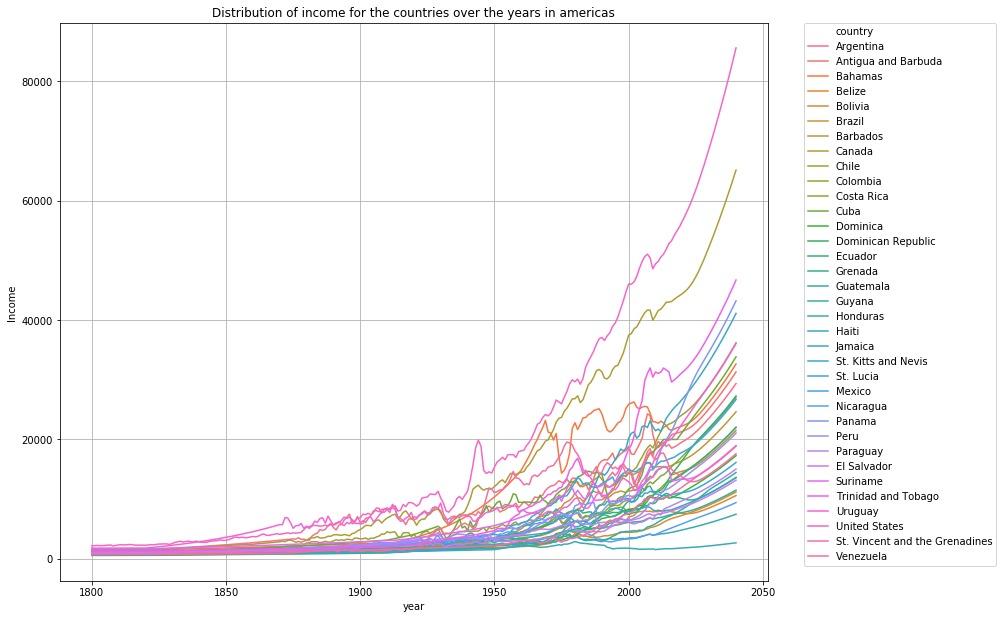

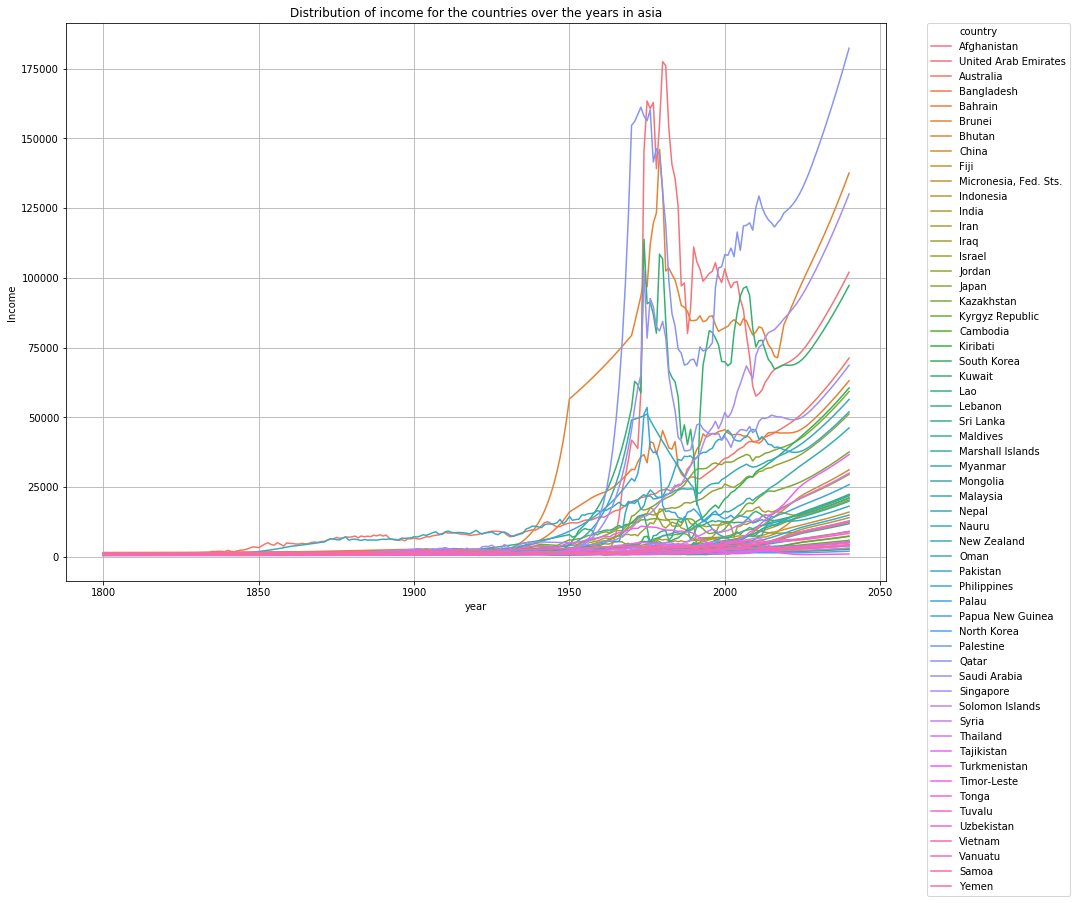

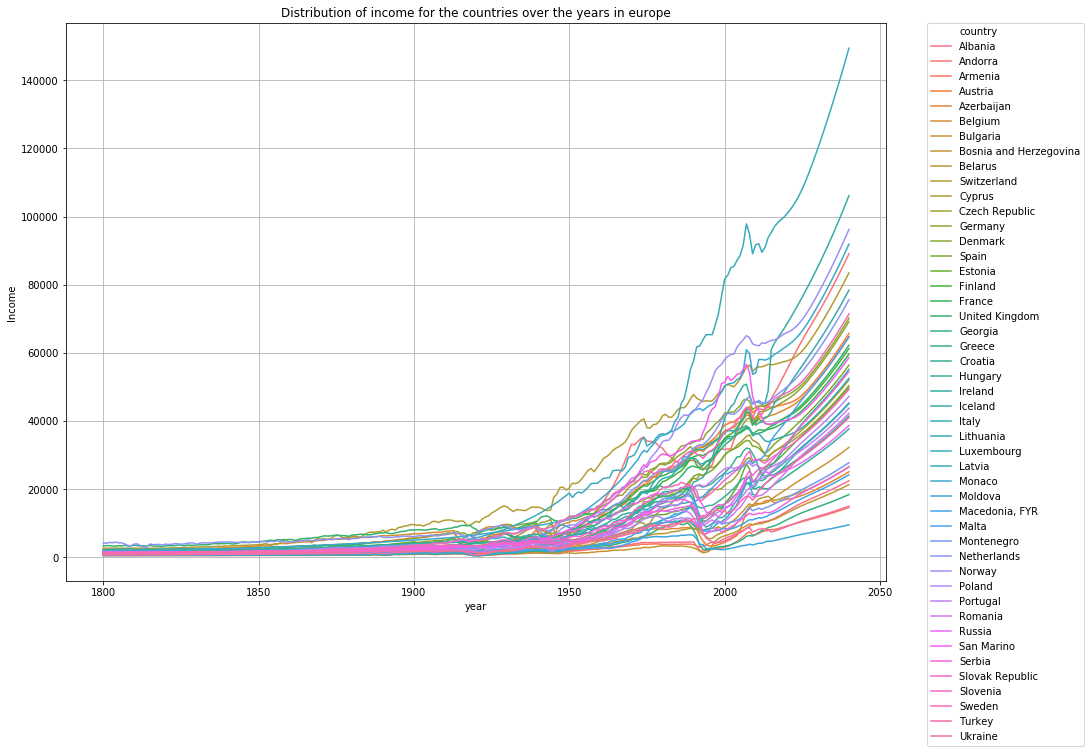

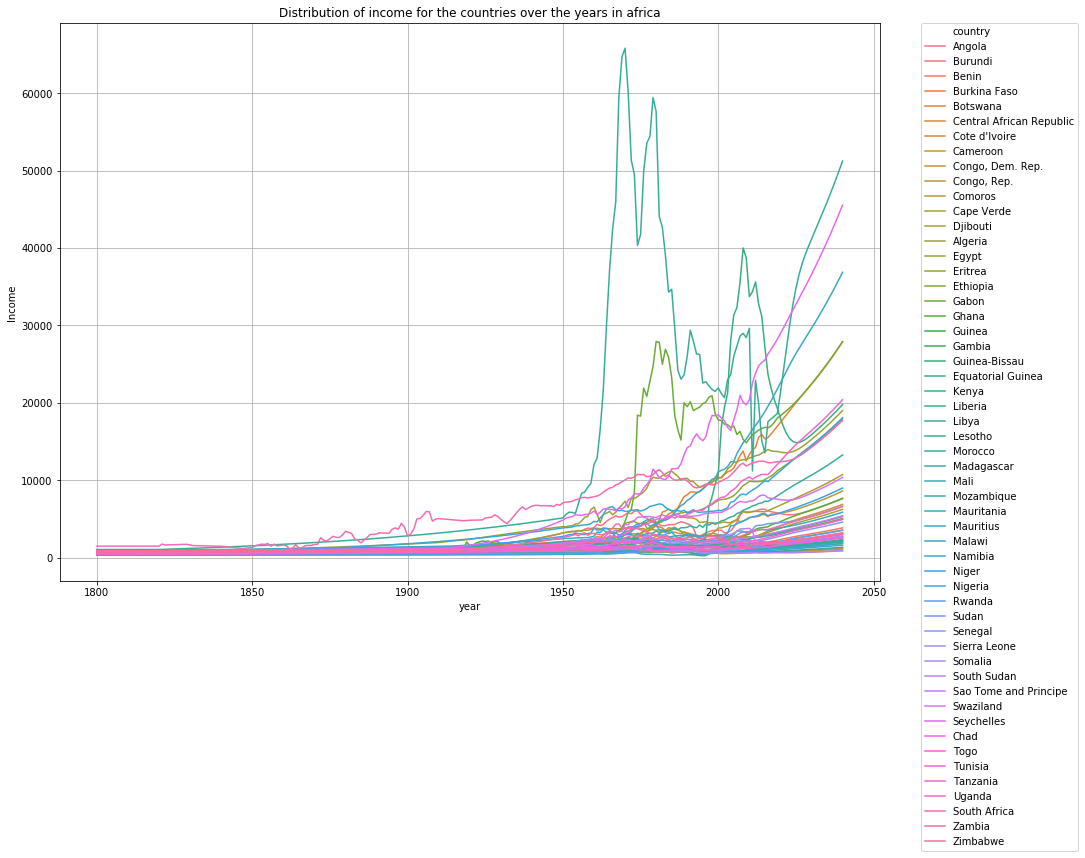

In [14]:
df = gdp_capita[['year', 'country', 'income', 'continent']]
for con in list(set(df['continent'])):
    df_con = df[df['continent'] == con]
    # Visualizing the distribution of income (GDP / capita) across continents and how it changes over time.
    # figure size in inches
    fig, host = plt.subplots()
    rcParams['figure.figsize'] = 14.7,10.27
    ax = sns.lineplot(x="year", y="income", hue="country", data=df_con)
    ax.set_title('Distribution of income for the countries over the years in ' + str(con))
    ax.set_ylabel('Income')
    ax.grid(True)
    # Put the legend out of the figure
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()

##### The above plot shows the income of the countries for each continent over time.

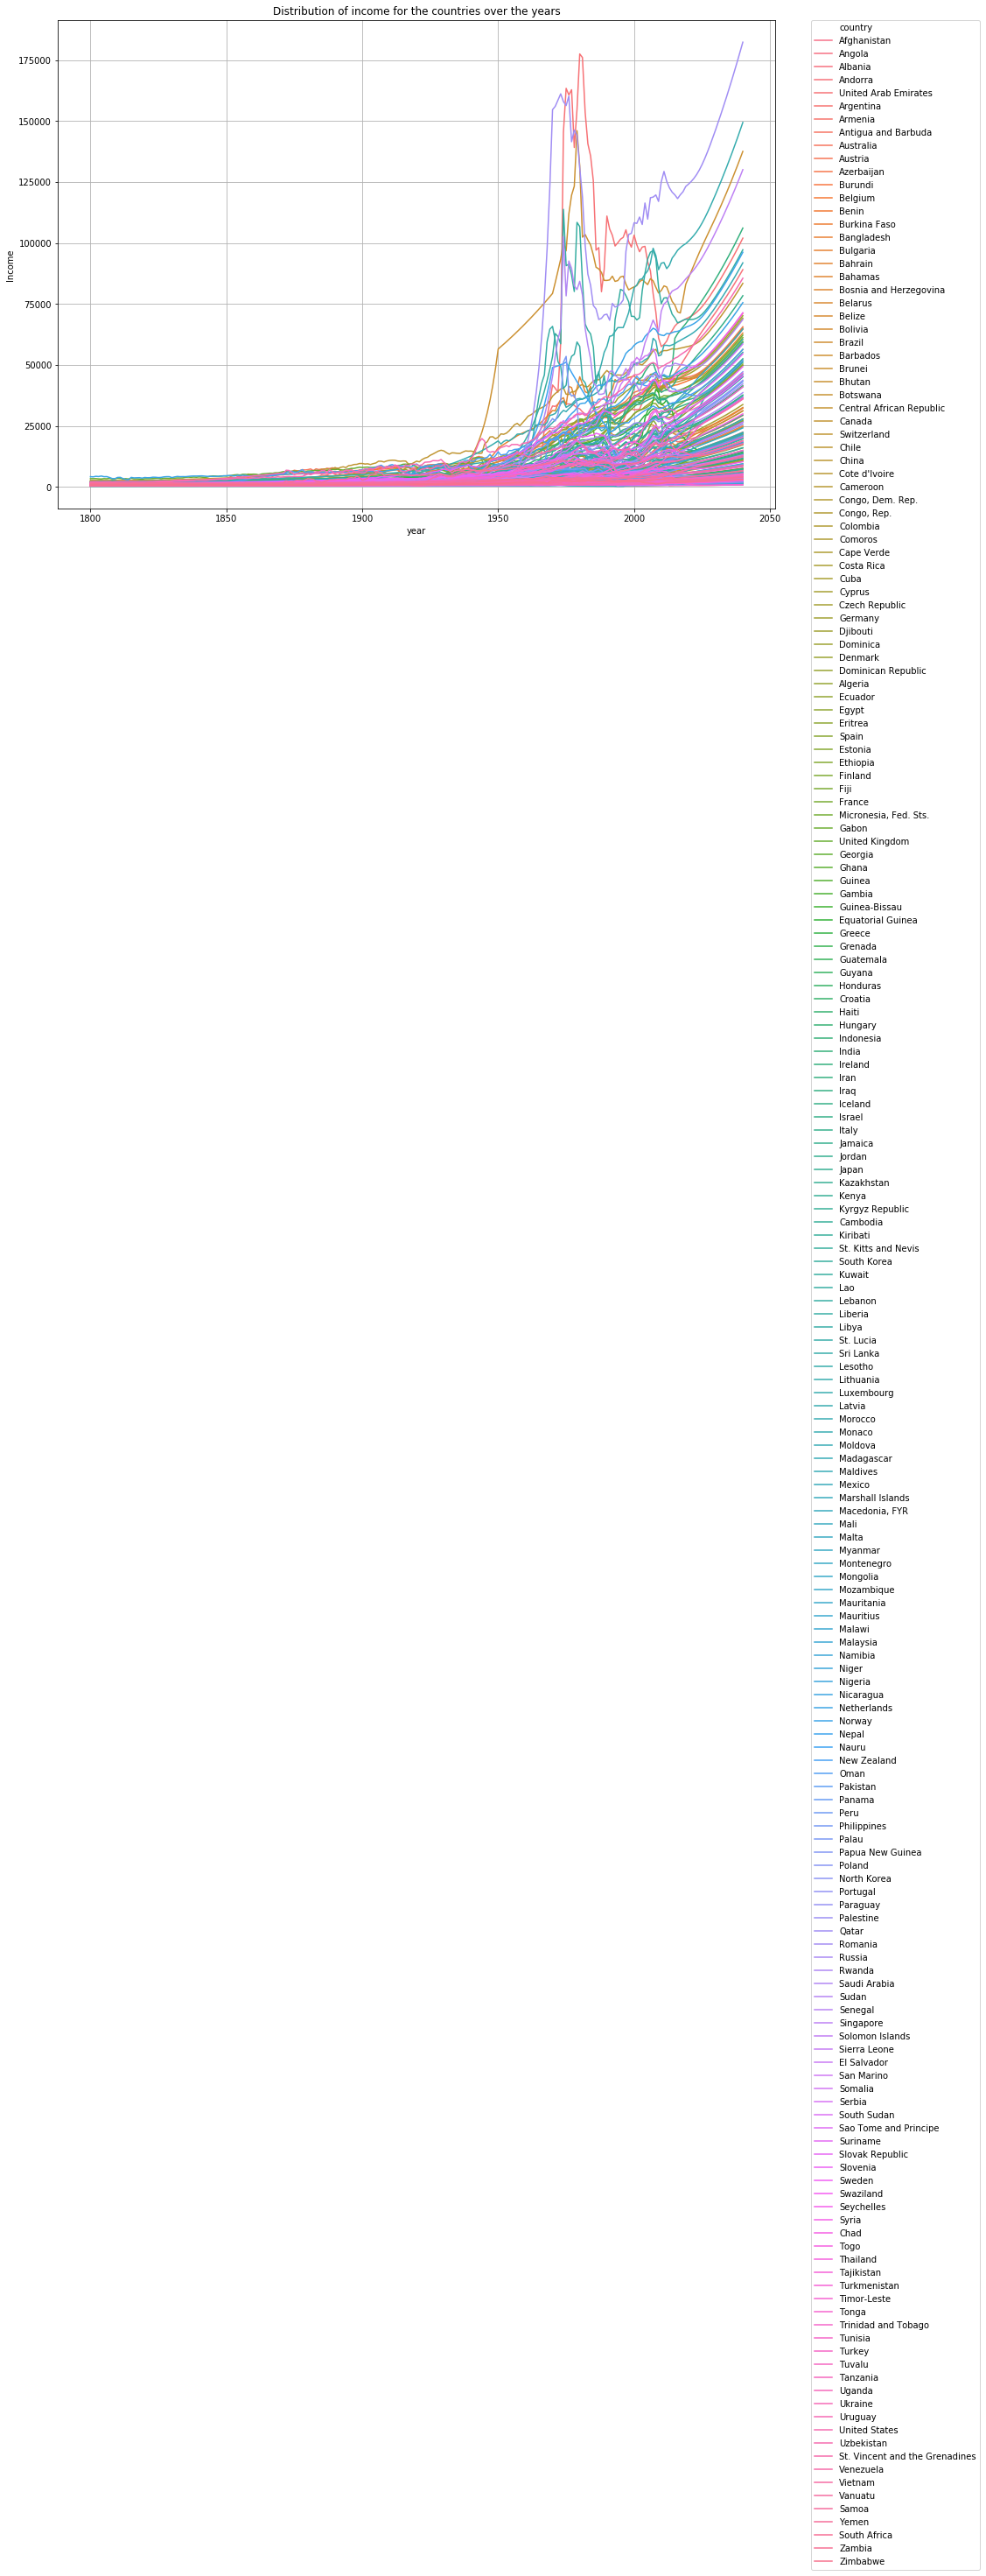

In [15]:
df = gdp_capita[['year', 'country', 'income', 'continent']]
# Visualizing the distribution of income (GDP / capita) across continents and how it changes over time.
# figure size in inches
rcParams['figure.figsize'] = 14.7,10.27
ax = sns.lineplot(x="year", y="income", hue="country", data=df)
ax.set_title('Distribution of income for the countries over the years')
ax.set_ylabel('Income')
ax.grid(True)
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

##### The above plot shows the income of all the countries over time. The caveats in the conclusion is that in the plots I am only considering the income in the form of gdp per capita. Not considering the population of the country. 

## Problem 3
Use visualization to investigate the relationship between income (GDP / capita), life expectancy, and child
mortality over time. How does each measure change over time within each continent?
Interpret your visualizations, noting any trends and/or outliers.


In [16]:
# Loading the dataset
folder_path = "ddf--gapminder--systema_globalis//"
gdp_capita = pd.read_csv(folder_path + 
                         "ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv")
# Renaming the columns
gdp_capita = gdp_capita.rename(columns={"income_per_person_gdppercapita_ppp_inflation_adjusted": "income", "time": "year"})

life_exp = pd.read_csv(folder_path + 'ddf--datapoints--life_expectancy_years--by--geo--time.csv')

# Renaming the columns
life_exp = life_exp.rename(columns={"life_expectancy_years": "life_exp", "time": "year"})

child_mor = pd.read_csv(folder_path + 'ddf--datapoints--child_mortality_0_5_year_olds_more_years_version_7--by--geo--time.csv')
# Renaming the columns
child_mor = child_mor.rename(columns={"child_mortality_0_5_year_olds_more_years_version_7": "child_mortality", "time": "year"})

gdp_capita["country"] = gdp_capita["geo"]
gdp_capita["continent"] = gdp_capita["geo"]
geo_country_map = pd.read_csv(folder_path + 'ddf--entities--geo--country.csv')
for i, row in gdp_capita.iterrows():
    gdp_capita.at[i,"country"] = geo_country_map[geo_country_map["country"] == row["geo"]].name.values[0]
    gdp_capita.at[i,"continent"] = geo_country_map[geo_country_map["country"] == row["geo"]].world_4region.values[0]
    
gdp_life_exp = pd.merge(gdp_capita, life_exp, how = 'left', on = ['geo', 'year'])

gdp_life_exp_child_mor = pd.merge(gdp_life_exp, child_mor, how = 'left', on = ['geo', 'year'])

In [17]:
gdp_life_exp_child_mor.head()

,geo,year,income,country,continent,life_exp,child_mortality
0,afg,1800,603,Afghanistan,asia,28.21,468.6
1,afg,1801,603,Afghanistan,asia,28.20,468.6
2,afg,1802,603,Afghanistan,asia,28.19,468.6
3,afg,1803,603,Afghanistan,asia,28.18,468.6
4,afg,1804,603,Afghanistan,asia,28.17,468.6


In [18]:
df = gdp_life_exp_child_mor.groupby(['continent', 'year'])['income', 'life_exp', 'child_mortality'].mean().reset_index()

df.head()

,continent,year,income,life_exp,child_mortality
0,africa,1800,626.740741,30.523519,439.098148
1,africa,1801,627.296296,30.397778,438.755769
2,africa,1802,627.907407,30.397963,438.755769
3,africa,1803,628.444444,30.524074,438.755769
4,africa,1804,629.037037,30.524259,438.755769


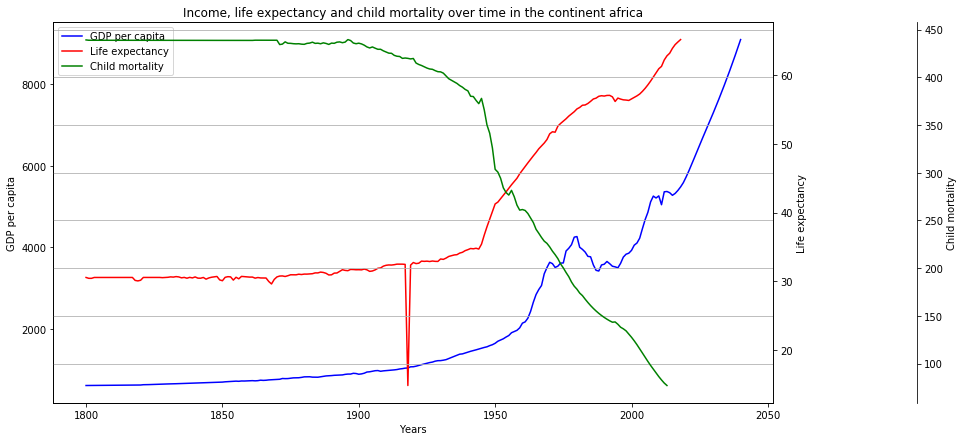

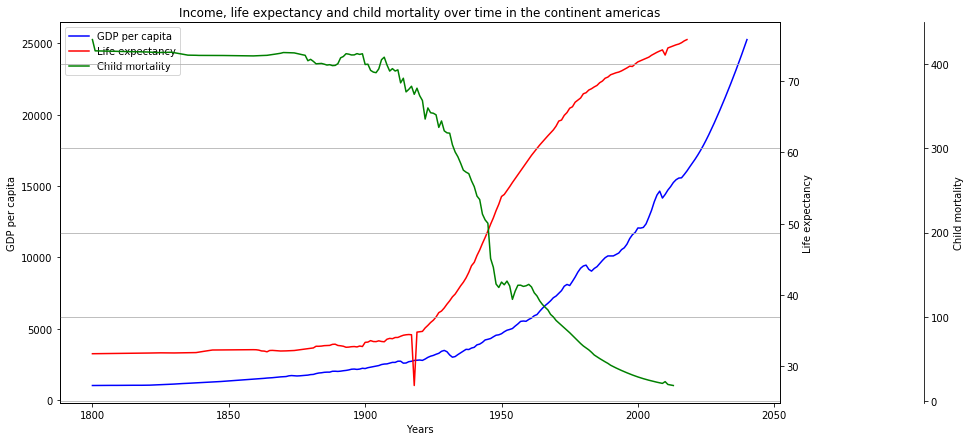

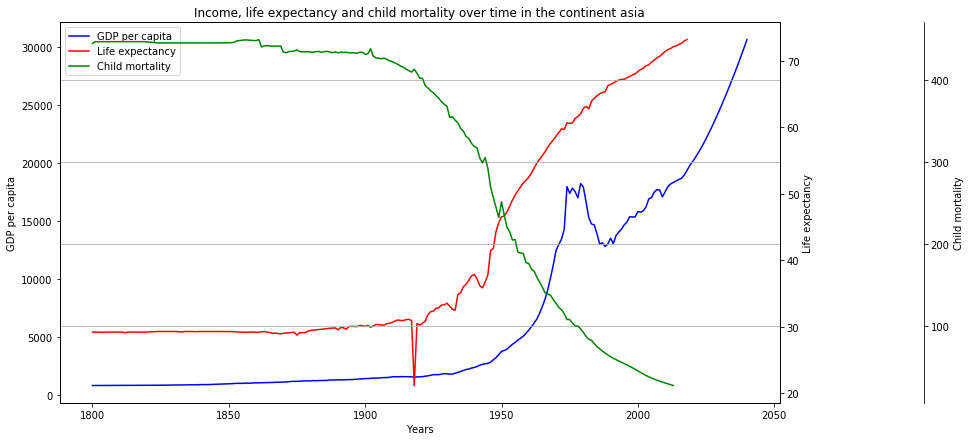

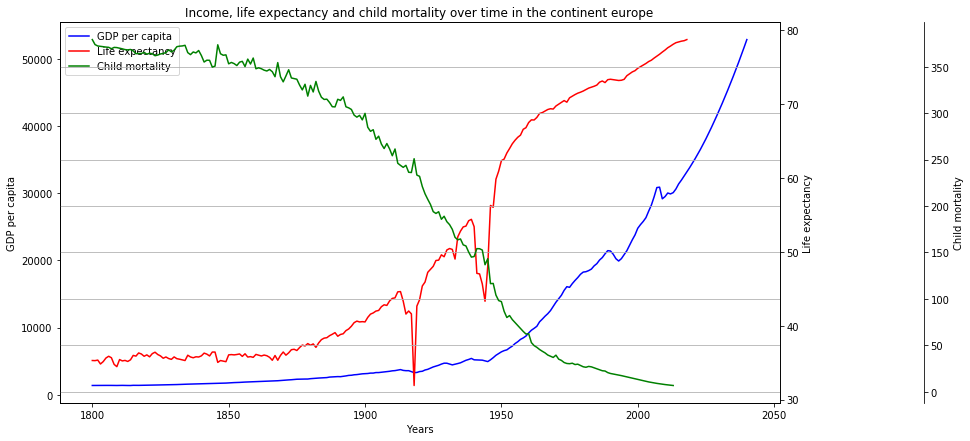

In [20]:
from pylab import rcParams
rcParams['figure.figsize'] = 16, 7

for val in df.continent.unique():
    
    df_con = df[df["continent"] == val]
    
    
    x = list(df_con['year'])
    y1 = list(df_con['income'])
    y2 = list(df_con['life_exp'])
    y3 = list(df_con['child_mortality'])
    
    fig, host = plt.subplots()
    fig.subplots_adjust(right=0.75)

    par1 = host.twinx()
    par2 = host.twinx()
    
    par2.spines["right"].set_position(("axes", 1.2))

    par2.spines["right"].set_visible(True)

    p1, = host.plot(x, y1, "b-", label="GDP per capita")
    p2, = par1.plot(x, y2, "r-", label="Life expectancy")
    p3, = par2.plot(x, y3, "g-", label="Child mortality")

    host.set_xlabel("Years")
    host.set_ylabel("GDP per capita")
    par1.set_ylabel("Life expectancy")
    par2.set_ylabel("Child mortality")
    plt.title("Income, life expectancy and child mortality over time in the continent "+ str(val))

    lines = [p1, p2, p3]

    host.legend(lines, [l.get_label() for l in lines])
    plt.grid(True)
    plt.show()

Based on the plots above, it can be observed that child mortality has decreased over-time in all the continents. This can be due to increased importance to health, technological and advances in medical science. Similarly, life expectancy increased over time in all the continents. It can also be seen from the plots that income has increased over time in all the continents. The increase in income across all the continents also explains the trend in child mortality and life expectancy.
In the plots from all the continents, the is an outlier around the 1920s in life expectancy. There may be an epidemic or some natural disaster or war during that time due to which life expectancy decreased. Child mortality decreased first in Europe and the last in Africa. Also, income is highest in Europe and lowest in Africa.


## Problem 4
Choose two variables you have not investigated yet, and visualize their distributions, their relationship with
each other, and how these change over time.
Interpret your visualizations, noting any trends and/or outliers.

In [21]:
# Loading the dataset
folder_path = "ddf--gapminder--systema_globalis//"
self_employment = pd.read_csv(folder_path + "ddf--datapoints--self_employed_percent_of_employment--by--geo--time.csv")
tot_popu = pd.read_csv(folder_path + "ddf--datapoints--population_total--by--geo--time.csv")
tot_popu["country"] = tot_popu["geo"]
tot_popu["continent"] = tot_popu["geo"]
geo_country_map = pd.read_csv(folder_path + 'ddf--entities--geo--country.csv')
for i, row in tot_popu.iterrows():
    tot_popu.at[i,"country"] = geo_country_map[geo_country_map["country"] == row["geo"]].name.values[0]
    tot_popu.at[i,"continent"] = geo_country_map[geo_country_map["country"] == row["geo"]].world_4region.values[0]
self_emp_popu = pd.merge(self_employment, tot_popu, how = 'left', on = ['geo', 'time'])
self_emp_popu["self_employ_pop"] = (self_emp_popu["self_employed_percent_of_employment"] * self_emp_popu["population_total"]) / 100

In [22]:
self_emp_popu.head()

,geo,time,self_employed_percent_of_employment,population_total,country,continent
0,afg,1991,63.791,12993657.0,Afghanistan,asia
1,afg,1992,65.565,13981231.0,Afghanistan,asia
2,afg,1993,70.821,15095099.0,Afghanistan,asia
3,afg,1994,76.204,16172719.0,Afghanistan,asia
4,afg,1995,74.500,17099541.0,Afghanistan,asia


In [23]:
self_emp_popu["self_employ_pop"] = (self_emp_popu["self_employed_percent_of_employment"] * self_emp_popu["population_total"]) / 100

In [24]:
df = self_emp_popu.groupby(['continent', 'time'])['population_total', 'self_employ_pop'].sum().reset_index()

In [25]:
df["percent"] = (df["self_employ_pop"] * 100) / df["population_total"]

In [26]:
df.head()

,continent,time,population_total,self_employ_pop,percent
0,africa,1991,650739150.0,4.556317e+08,70.017569
1,africa,1992,668170844.0,4.688371e+08,70.167246
2,africa,1993,685838812.0,4.808719e+08,70.114417
3,africa,1994,703714700.0,4.909733e+08,69.768795
4,africa,1995,721787613.0,5.047234e+08,69.926854


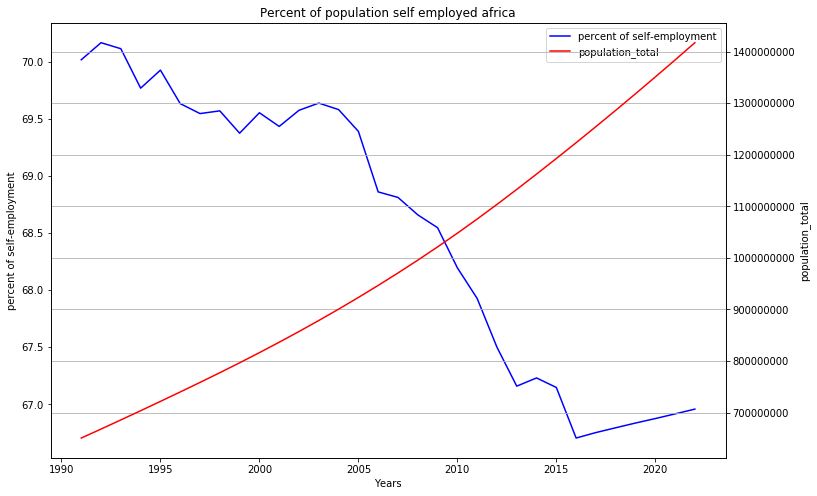

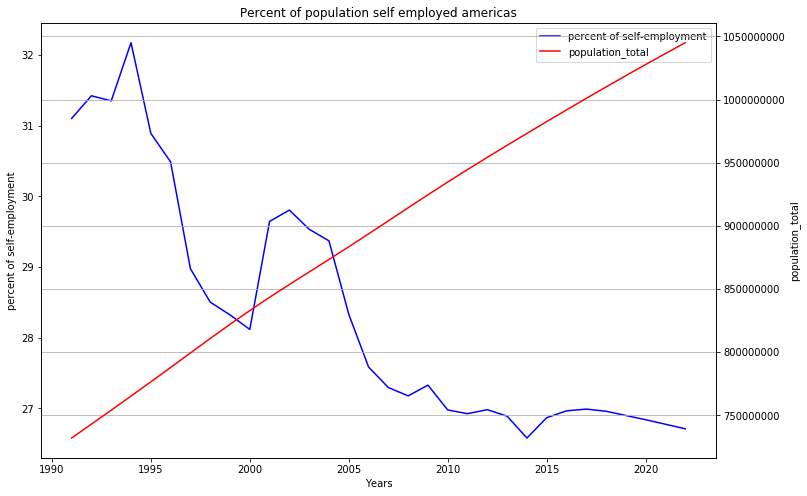

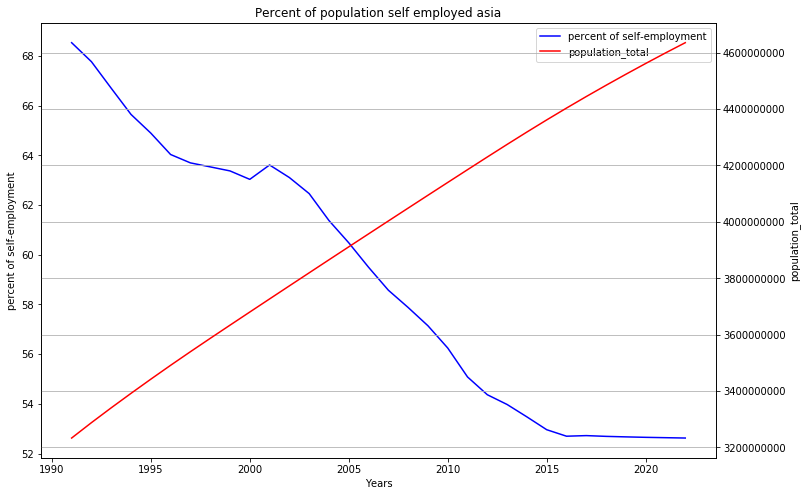

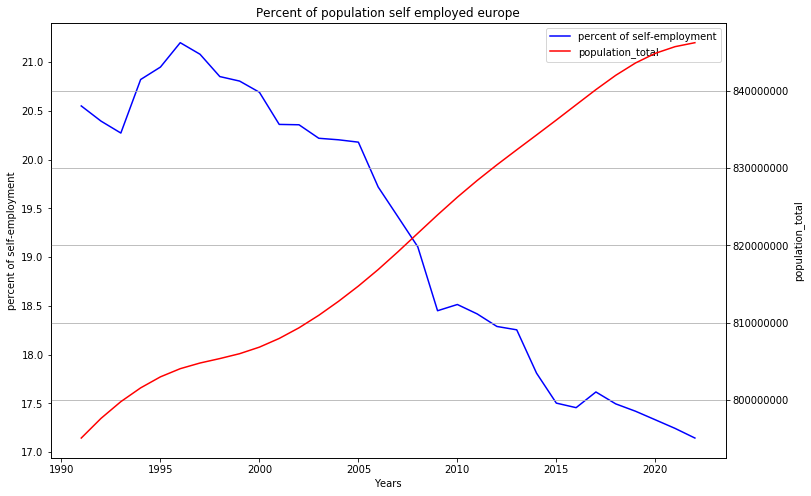

In [27]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 8

for val in df.continent.unique():
    df_con = df[df["continent"] == val]
    
    
    x = list(df_con['time'])
    y1 = list(df_con['percent'])
    y2 = list(df_con['population_total'])
    
    
    fig, host = plt.subplots()
    fig.subplots_adjust(right=0.75)

    par1 = host.twinx()


    p1, = host.plot(x, y1, "b-", label="percent of self-employment")
    p2, = par1.plot(x, y2, "r-", label="population_total")


    host.set_xlabel("Years")
    host.set_ylabel("percent of self-employment")
    par1.set_ylabel("population_total")

    plt.title("Percent of population self employed "+ str(val))

    lines = [p1, p2]

    host.legend(lines, [l.get_label() for l in lines])
    host.ticklabel_format(style='plain')
    par1.ticklabel_format(style='plain')

    plt.grid(True)
    plt.show()

For this question, I considered the distribution of population and percent of self-employment across continents over the years.
The population has increased for all the continents. Also, over the years self-employment has decreased. Self-employment was the highest in Africa. This makes sense as before the industrial revolution, most of the low-income countries were farmers and cattle rearers. So they were self-employed. Over the years self-employment decreased and people started working for corporations.

## Problem 5
Did you use static or interactive plots to answer the previous problems?
Explore the data using the interactive visualization tools at https://www.gapminder.org/tools, and watch
the TED talk “The best stats you’ve ever seen” at https://www.youtube.com/watch?v=hVimVzgtD6w.
Discuss the advantages, disadvantages, and relative usefulness of using interactive/dynamic visualizations
versus static visualizations.

I used static plots to answer previous problems.

Advantages of interactive plots:
- Since it shows movement in data it is better in conveying a story in the form of data.
- In interactive plots, if we are interested in a particular aspect, (like a particular country) it can be selected and analyzed
    better as the selected aspect is highlighted. This helps focus on a particular thing at once.
- It is better to use when there are a lot of variables.
- Makes it easier to interpret and understand the information

Disadvantages of interactive plots:
- It can get complex to build.
- It needs the attention of the audience to understand the data at every stage.
- It cannot be used for publications like research papers or books.
- If the plot is fairly simple, a static plot will take less time to convey the information as compared to an interactive plot

Advantages of the static plot:
- Comparatively simple to build.
- A static plot can be published in research papers and books.
- Conveys all the information at once.
- Better in visualizing plots with fewer number (3 or less than 3) variable interactions.

Disadvantages of Static plots:
- In case of a large number of variables, static plots would either have too much in one plot which would make it difficult to 
 read and interpret or it would you multiple plots to convey the information which would make it difficult to understand
 the relationship between the variables.